In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data Science Salary 2021 to 2023.csv')
df.sample(7)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
609,2023,SE,FT,Machine Learning Engineer,176100,USD,176100,US,L
2281,2022,MI,FT,Data Engineer,99100,USD,99100,US,M
937,2023,SE,FT,Data Scientist,115000,USD,115000,US,M
1948,2022,EX,FT,Head of Data Science,167875,USD,167875,US,M
3354,2022,SE,FT,Data Engineer,93700,USD,93700,US,M
2005,2022,MI,FT,Data Engineer,80000,USD,80000,US,M
1118,2023,SE,FT,Data Scientist,185900,USD,185900,US,M


In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [6]:
#work_year to category type
#df['work_year'] = df['work_year'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3761.0,2022.374103,0.691252,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3761.0,190599.886200,671145.715636,6000.0,100000.0,137500.0,180000.0,30400000.0
salary_in_usd,3761.0,137555.178942,63022.267974,5132.0,95000.0,135000.0,175000.0,450000.0


In [9]:
#Check for missing values
df.apply(lambda x: sum(x.isnull()))

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>,
        <Axes: title={'center': 'salary_in_usd'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

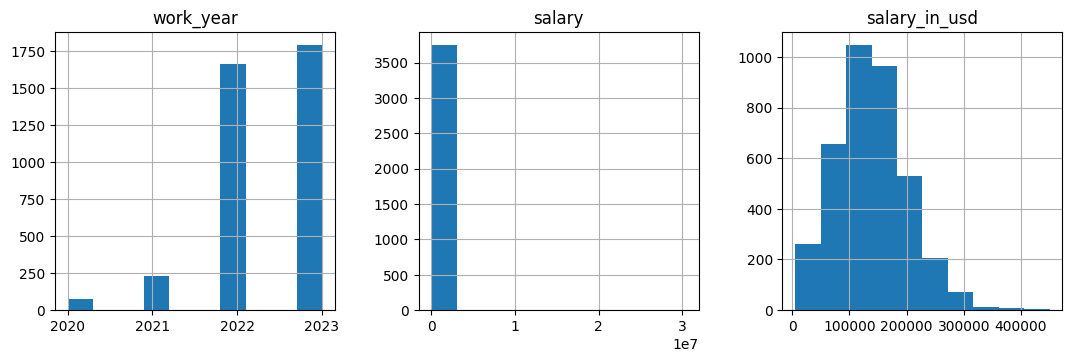

In [10]:
#Graphical visualization to understand the data distribution
df.hist(layout= (3,3), sharex=False, figsize =(13,13))

In [11]:
#Check duplicates
df.duplicated().sum()

1351

In [12]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
unique_experience_levels = df['experience_level'].unique()
unique_employment_types = df['employment_type'].unique()
unique_company_sizes = df['company_size'].unique()

print('Unique Experience Levels:',unique_experience_levels)
print('Unique Employment Types:',unique_employment_types)
print('Unique Company Size:',unique_company_sizes)

Unique Experience Levels: ['EN' 'EX' 'MI' 'SE']
Unique Employment Types: ['FT' 'PT' 'CT' 'FL']
Unique Company Size: ['L' 'M' 'S']


In [14]:
df['employment_type']=df['employment_type'].replace('FT', 'Full Time')
df['employment_type']=df['employment_type'].replace('PT', 'Part Time')
df['employment_type']=df['employment_type'].replace('CT', 'Contract')
df['employment_type']=df['employment_type'].replace('FL', 'Freelance')

df['company_size'] = df['company_size'].replace('L','Large')
df['company_size'] = df['company_size'].replace('M','Medium')
df['company_size'] = df['company_size'].replace('S','Small')

In [15]:
replacement ={'EN': 'Entry Level',
              'MI':'Mid Level',
              'SE': 'Senior',
              'EX':'Experienced'}

df['experience_level'] = df['experience_level'].map(replacement)
df['experience_level'].value_counts()

experience_level
Senior         1417
Mid Level       631
Entry Level     267
Experienced      95
Name: count, dtype: int64

<Axes: xlabel='experience_level'>

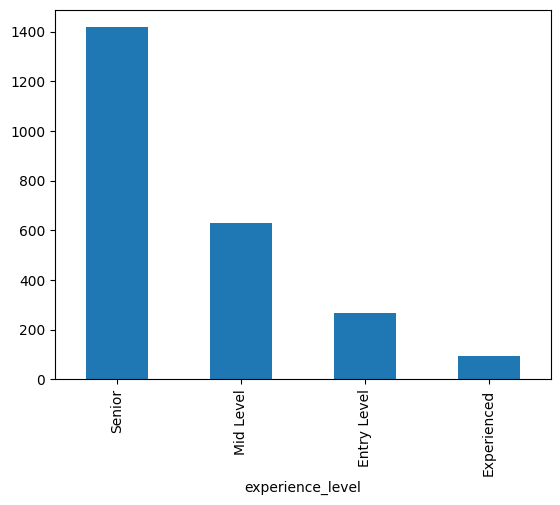

In [16]:
df['experience_level'].value_counts().plot(kind='bar')

<Axes: xlabel='employment_type'>

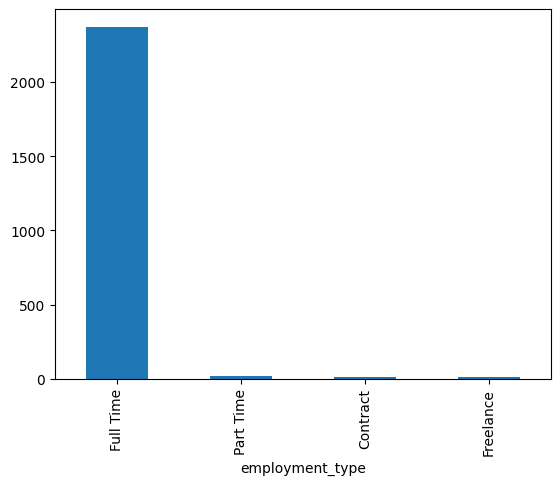

In [17]:
df['employment_type'].value_counts().plot(kind='bar')

<Axes: xlabel='company_size'>

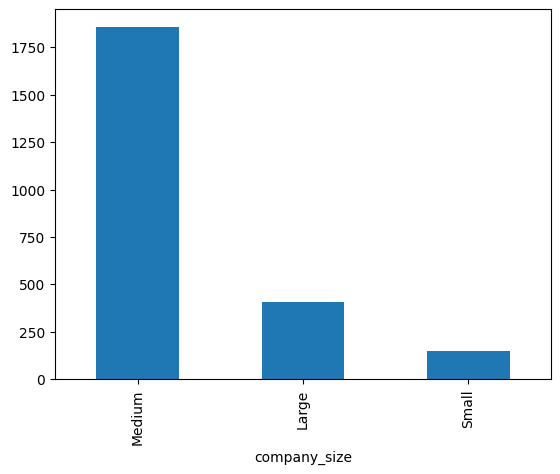

In [18]:
df['company_size'].value_counts().plot(kind='bar')

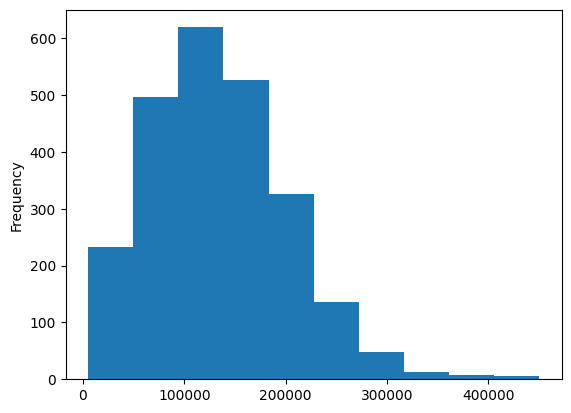

In [19]:
df['salary_in_usd'].plot(kind='hist')
plt.show()